In [1]:
import pandas as pd
day = pd.read_csv("day.csv")

In [2]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day.shape

(731, 16)

In [4]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

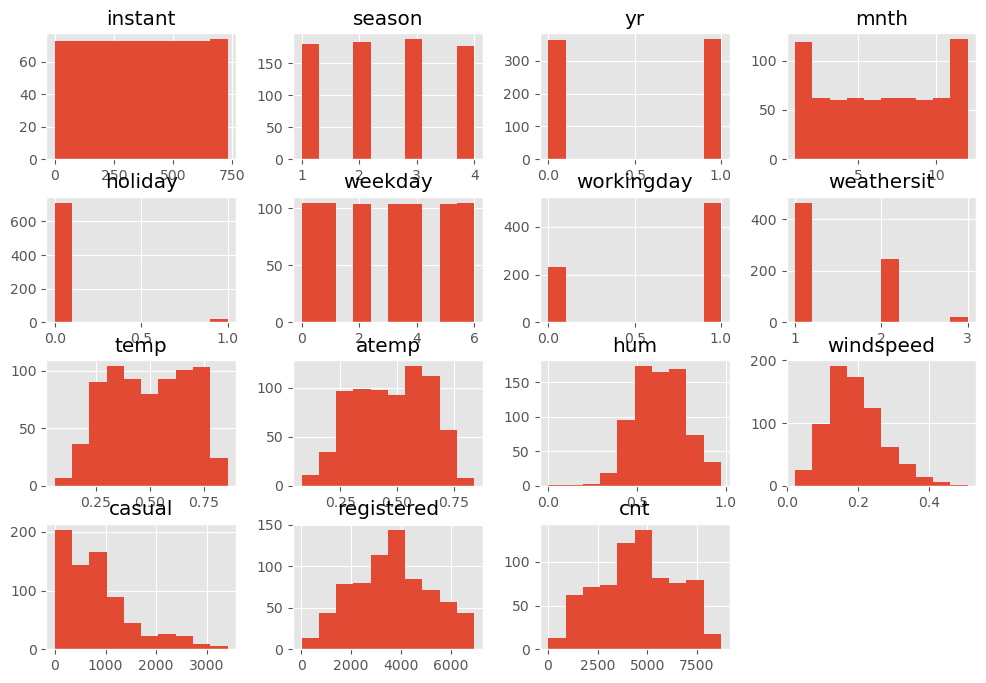

In [6]:
day.hist(figsize=(12,8))
plt.show()


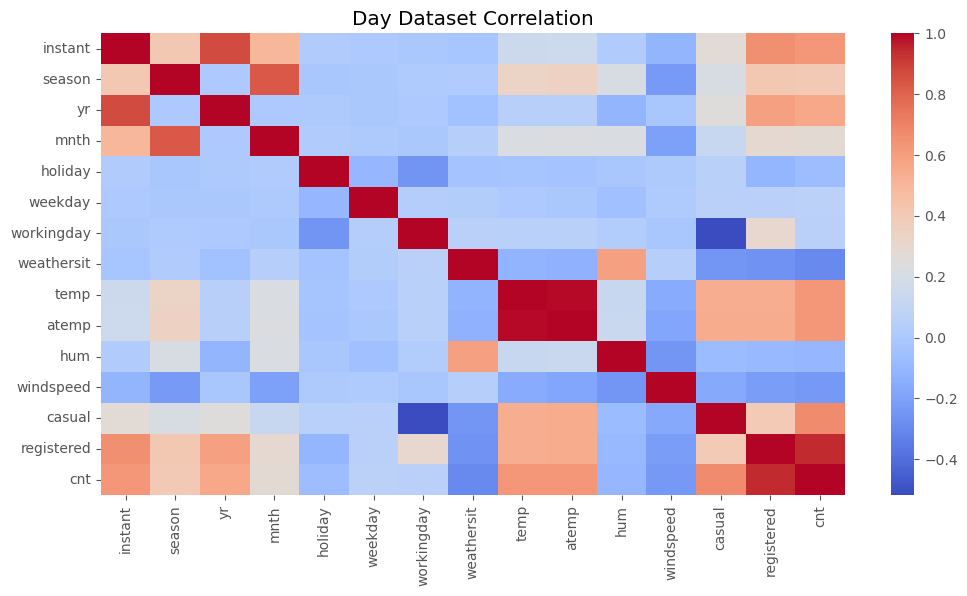

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(day.select_dtypes(include=['int64','float64']).corr(), cmap="coolwarm")
plt.title("Day Dataset Correlation")
plt.show()

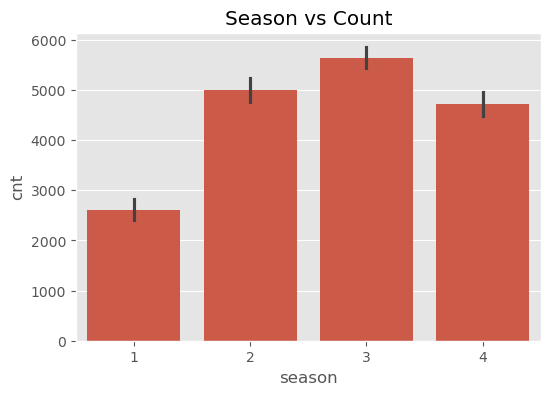

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(x="season", y="cnt", data=day)
plt.title("Season vs Count")
plt.show()

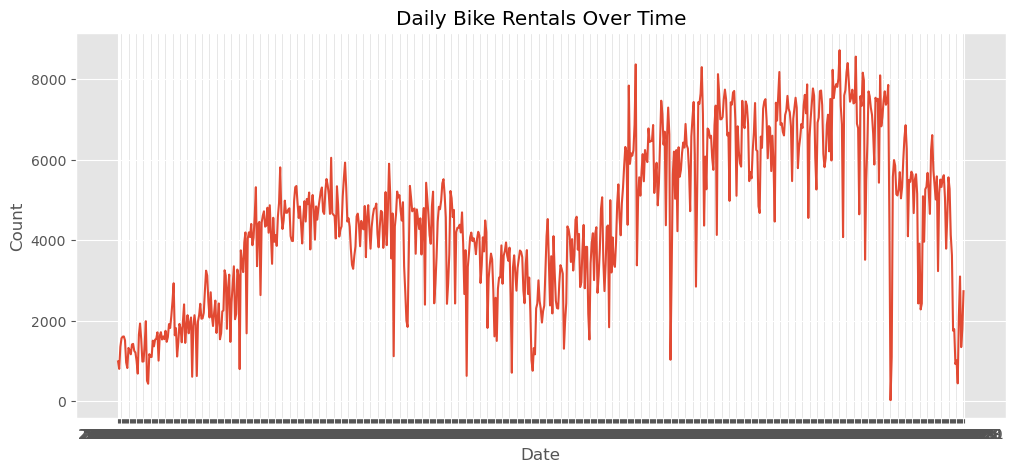

In [9]:
plt.figure(figsize=(12,5))
plt.plot(day['dteday'], day['cnt'])
plt.title("Daily Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

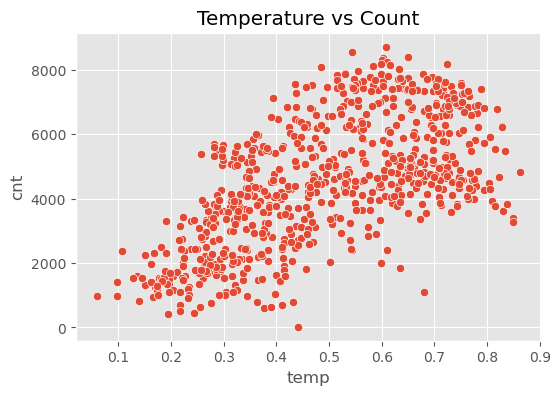

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="temp", y="cnt", data=day)
plt.title("Temperature vs Count")
plt.show()


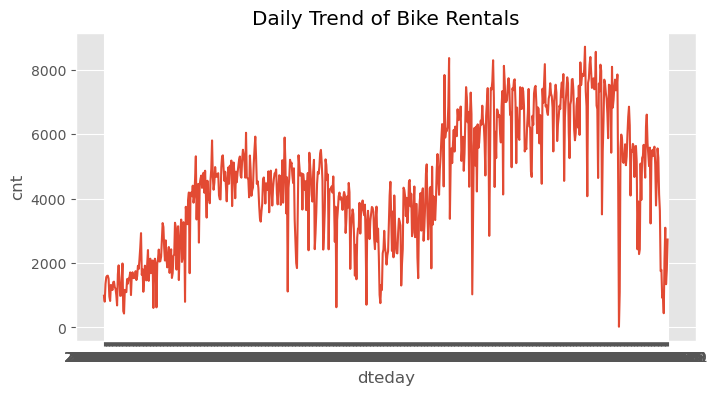

In [11]:
plt.figure(figsize=(8,4))
sns.lineplot(x="dteday", y="cnt", data=day)
plt.title("Daily Trend of Bike Rentals")
plt.show() 

In [12]:
day = day.drop(columns=["instant", "dteday", "yr", "casual", "registered"])
print("\nDay dataset after dropping columns:")
print(day.head().to_string(index=False))


Day dataset after dropping columns:
 season  mnth  holiday  weekday  workingday  weathersit     temp    atemp      hum  windspeed  cnt
      1     1        0        6           0           2 0.344167 0.363625 0.805833   0.160446  985
      1     1        0        0           0           2 0.363478 0.353739 0.696087   0.248539  801
      1     1        0        1           1           1 0.196364 0.189405 0.437273   0.248309 1349
      1     1        0        2           1           1 0.200000 0.212122 0.590435   0.160296 1562
      1     1        0        3           1           1 0.226957 0.229270 0.436957   0.186900 1600


In [13]:
day.isnull().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [14]:
day_duplicates = day.duplicated().sum()
print("Number of duplicate days:", day_duplicates)

Number of duplicate days: 0


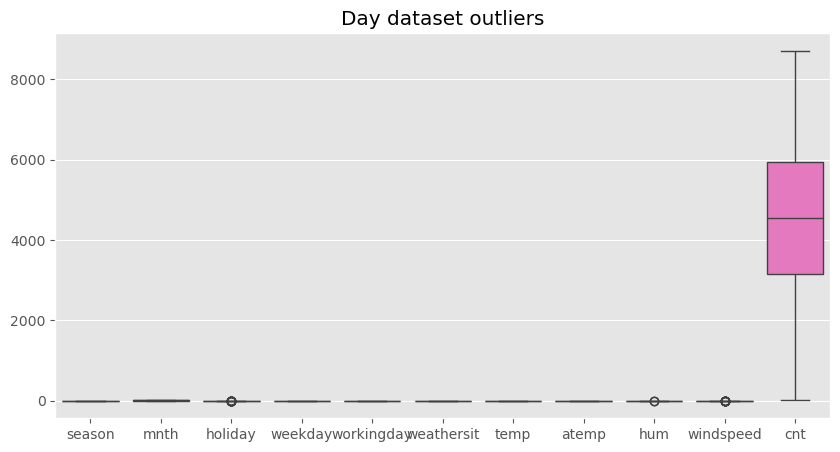

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=day)
plt.title("Day dataset outliers")
plt.show()

In [16]:
Q1 = day.quantile(0.25)
Q3 = day.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

day_cleaned = day[~((day < lower_limit) | (day > upper_limit)).any(axis=1)]
print("Original Day Shape:", day.shape)
print("After Removing Outliers:", day_cleaned.shape)

Original Day Shape: (731, 11)
After Removing Outliers: (696, 11)


In [32]:
print("\nNull values per column (Daily):")
print(day.isnull().sum())
day = day.fillna(day.median())
print("After filling, nulls (Daily):", day.isnull().sum().sum())


Null values per column (Daily):
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64
After filling, nulls (Daily): 0


In [25]:
X_day = day.drop("cnt", axis=1)
y_day = day["cnt"]

In [26]:
def train_evaluate_rf(X_train, X_test, y_train, y_test, dataset_name="Dataset"):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import numpy as np

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{dataset_name} Metrics")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}\n")

    return rf, mae, rmse, r2

In [27]:
from sklearn.model_selection import train_test_split

X_train_day, X_test_day, y_train_day, y_test_day = train_test_split(
    X_day, y_day, test_size=0.2, random_state=42
)

In [28]:
rf_day, mae_day, rmse_day, r2_day = train_evaluate_rf(
    X_train_day, X_test_day, y_train_day, y_test_day, "Daily Data"
)

Daily Data Metrics
MAE: 1083.93, RMSE: 1305.34, R²: 0.58



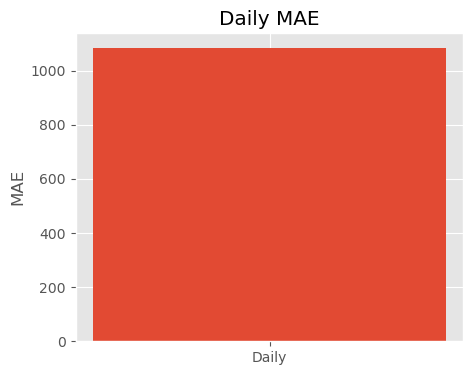

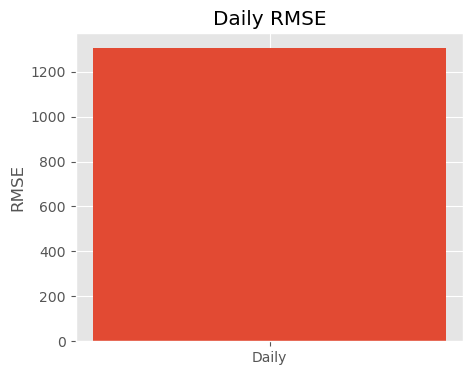

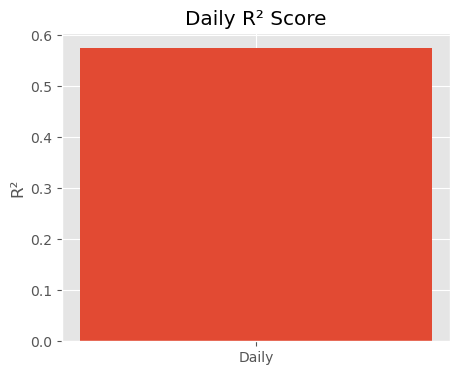

In [29]:
                     #DAILY METRICS GRAPHS

# MAE
plt.figure(figsize=(5,4))
plt.bar(["Daily"], [mae_day])
plt.title("Daily MAE")
plt.ylabel("MAE")
plt.show()

# RMSE
plt.figure(figsize=(5,4))
plt.bar(["Daily"], [rmse_day])
plt.title("Daily RMSE")
plt.ylabel("RMSE")
plt.show()

# R²
plt.figure(figsize=(5,4))
plt.bar(["Daily"], [r2_day])
plt.title("Daily R² Score")
plt.ylabel("R²")
plt.show()

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(random_state=42)
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results.append({
            "Model": name,
            "MAE": mean_absolute_error(y_test, y_pred),
            "RMSE": (mean_squared_error(y_test, y_pred)),
            "R2": r2_score(y_test, y_pred)
        })

    return pd.DataFrame(results)

   

In [42]:
# Daily
day_results = train_evaluate_models(
    X_train_day, X_test_day, y_train_day, y_test_day
)
print("Daily Results")
display(day_results)

Daily Results


,Model,MAE,RMSE,R2
0,Linear Regression,1143.393718,1.796978e+06,0.551863
1,Decision Tree,1248.163265,2.705526e+06,0.325285
2,Random Forest,1083.931088,1.703909e+06,0.575073


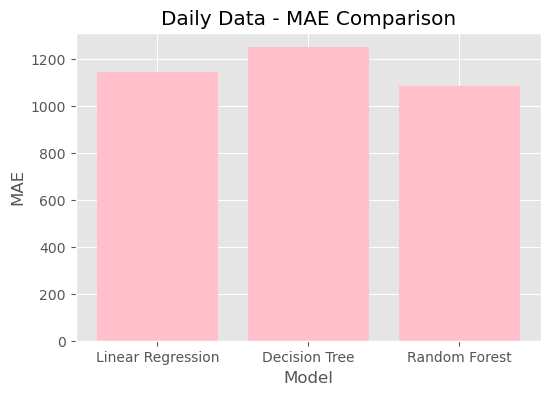

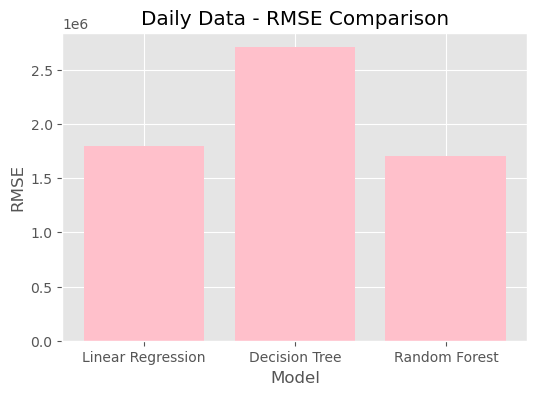

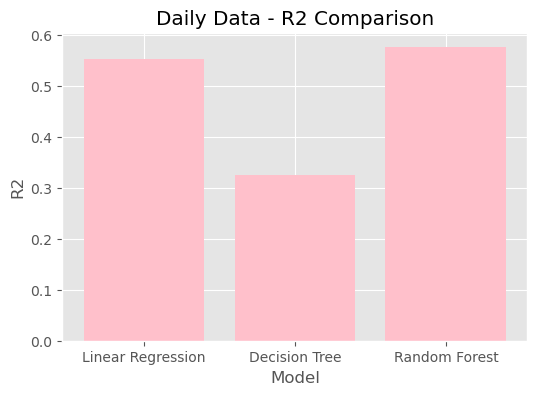

In [47]:
# Daily Data Boxplot
metrics = ["MAE", "RMSE", "R2"]

for metric in metrics:
    plt.figure(figsize=(6,4))
    plt.bar(day_results["Model"], day_results[metric], color='pink')
    plt.title(f"Daily Data - {metric} Comparison")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.show()

In [48]:
models_day = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

print("----- DAILY DATA (TRAIN vs TEST) -----\n")

for name, model in models_day.items():
    model.fit(X_train_day, y_train_day)
    
    train_pred = model.predict(X_train_day)
    test_pred  = model.predict(X_test_day)
    
    r2_train = r2_score(y_train_day, train_pred)
    r2_test  = r2_score(y_test_day, test_pred)
    
    print(f"{name}")
    print(f"Train R²: {r2_train:.2f}")
    print(f"Test  R²: {r2_test:.2f}")
    
    if r2_train < 0.6 and r2_test < 0.6:
        print("→ Underfitting\n")
    elif r2_train - r2_test > 0.15:
        print("→ Overfitting\n")
    else:
        print("→ Good Fit\n")

----- DAILY DATA (TRAIN vs TEST) -----

Linear Regression
Train R²: 0.52
Test  R²: 0.55
→ Underfitting

Decision Tree
Train R²: 1.00
Test  R²: 0.33
→ Overfitting

Random Forest
Train R²: 0.95
Test  R²: 0.58
→ Overfitting



In [49]:
# Daily
day_results_test = []

for name, model in models_day.items():
    model.fit(X_train_day, y_train_day)
    train_pred = model.predict(X_train_day)
    test_pred  = model.predict(X_test_day)
    r2_train = r2_score(y_train_day, train_pred)
    r2_test  = r2_score(y_test_day, test_pred)
    
    day_results_test.append({
        "Model": name,
        "Train_R2": r2_train,
        "Test_R2": r2_test
    })

day_results_test = pd.DataFrame(day_results_test)

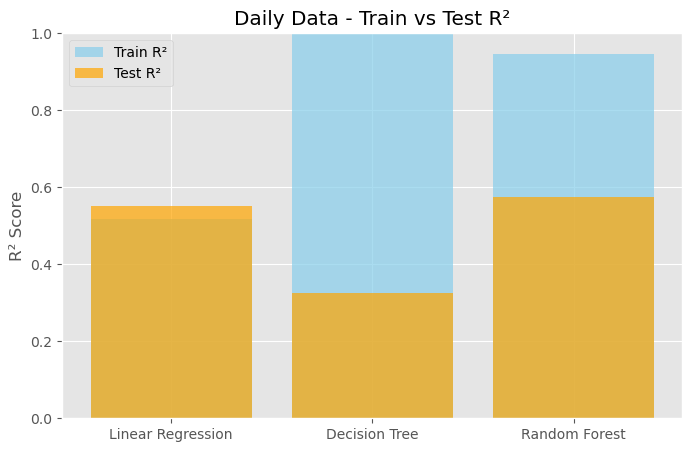

In [50]:
def plot_train_test_r2(df, dataset_name="Dataset"):
    plt.figure(figsize=(8,5))
    plt.bar(df['Model'], df['Train_R2'], alpha=0.7, label='Train R²', color='skyblue')
    plt.bar(df['Model'], df['Test_R2'], alpha=0.7, label='Test R²', color='orange')
    plt.title(f"{dataset_name} - Train vs Test R²")
    plt.ylabel("R² Score")
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

# Daily
plot_train_test_r2(day_results_test, "Daily Data")

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
day = pd.read_csv("day.csv", parse_dates=['dteday']) 
day['year'] = day['dteday'].dt.year
day['month'] = day['dteday'].dt.month
day['day'] = day['dteday'].dt.day
day['weekday'] = day['dteday'].dt.weekday

In [53]:
features = ['year', 'month', 'day', 'weekday', 'temp', 'hum', 'windspeed'] 
target = 'cnt'

X = day[features]
y = day[target]


In [54]:
#Train-Test SPlit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [55]:
#HyperParameter Tuning
rf_day = RandomForestRegressor(
    n_estimators=300,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=17,
    random_state=42,
    n_jobs=-1
)

In [56]:
# Training
rf_day.fit(X_train_scaled, y_train)
print("Trained Random Forest Model:")
print(rf_day)

Trained Random Forest Model:
RandomForestRegressor(max_depth=5, min_samples_leaf=17, min_samples_split=10,
                      n_estimators=300, n_jobs=-1, random_state=42)


In [57]:
#Test and train Predictions
y_train_pred = rf_day.predict(X_train_scaled)  # train predictions
y_test_pred  = rf_day.predict(X_test_scaled)   # test predictions

In [59]:
# Evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = (mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = (mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Training Data → MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")
print(f"Test Data     → MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.2f}")

Training Data → MAE: 569.62, RMSE: 573627.05, R²: 0.84
Test Data     → MAE: 624.34, RMSE: 835572.56, R²: 0.79


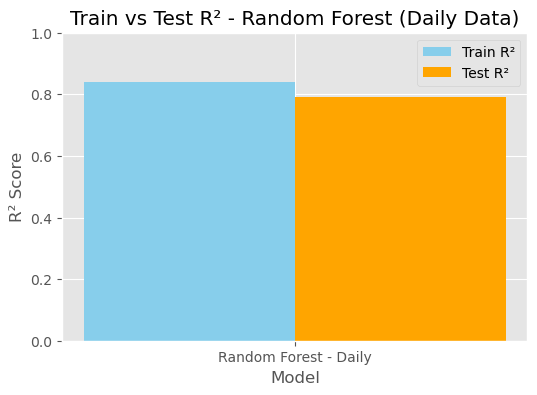

In [60]:
#bar chart
# Values
models = ['Random Forest - Daily']
train_r2 = [0.84]  # your training R²
test_r2  = [0.79]  # your test R²

# Plot
plt.figure(figsize=(6,4))
bar_width = 0.4
x = range(len(models))

plt.bar(x, train_r2, width=bar_width, label='Train R²', color='skyblue')
plt.bar([i + bar_width for i in x], test_r2, width=bar_width, label='Test R²', color='orange')

plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Train vs Test R² - Random Forest (Daily Data)")
plt.xticks([i + bar_width/2 for i in x], models)
plt.ylim(0,1)
plt.legend()
plt.show()

In [69]:
rf_day

features = ['year', 'month', 'day', 'weekday', 'temp', 'hum', 'windspeed']

In [70]:
day['year'] = day['dteday'].dt.year
day['month'] = day['dteday'].dt.month
day['day'] = day['dteday'].dt.day
day['weekday'] = day['dteday'].dt.weekday

last_day = day.iloc[-1].copy()

In [71]:
future_days = []

last_row = X_test.iloc[-1]
current_date = day.loc[X_test.index[-1], 'dteday']

for i in range(1, 7):
    next_date = current_date + pd.Timedelta(days=1)

    input_row = pd.DataFrame([{
        'year': next_date.year,
        'month': next_date.month,
        'day': next_date.day,
        'weekday': next_date.weekday(),
        'temp': last_row['temp'] * (1 + 0.02*i),     # ⬅ increased
        'hum': last_row['hum'] * (1 - 0.01*i),       # ⬅ increased
        'windspeed': last_row['windspeed'] * (1 + 0.005*i)
    }])

    pred = rf_day.predict(input_row.values)[0]

    future_days.append({
        'Date': next_date.date(),
        'Predicted_Count': int(round(pred))
    })

    current_date = next_date

       

In [72]:
day_predictions = pd.DataFrame(future_days)
day_predictions

,Date,Predicted_Count
0,2011-05-17,6758
1,2011-05-18,6843
2,2011-05-19,6930
3,2011-05-20,6942
4,2011-05-21,6956
5,2011-05-22,7016


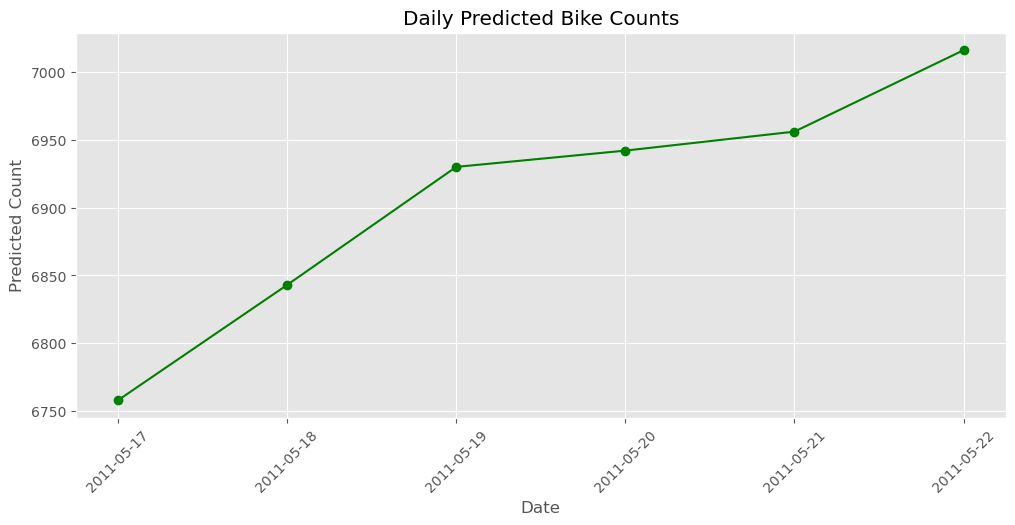

In [80]:
predicted_counts = [6758, 6843, 6930, 6942, 6956, 7016] 
dates = pd.date_range(start='2011-05-17', periods=len(predicted_counts))  
plt.figure(figsize=(12,5))
plt.plot(day_predictions['Date'], day_predictions['Predicted_Count'], marker='o', color='green')
plt.title("Daily Predicted Bike Counts")
plt.xlabel("Date")
plt.ylabel("Predicted Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

